In [1]:
import pandas as pd
import numpy as np
import sklearn
import mlflow
import mlflow.sklearn
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784',version=1)

In [111]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
X,y = mnist['data'],mnist['target']

X_train, X_test,y_train,y_test = X[:20000],X[60000:],y[:20000],y[60000:]

random_clf = RandomForestClassifier(random_state = 42)
random_clf.fit(X_train,y_train)
pred_score = cross_val_score(random_clf,X_train,y_train,cv = 3,scoring= "accuracy")



In [112]:
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler,MinMaxScaler
std_scaler= StandardScaler()
X_train_scaled = std_scaler.fit_transform(X_train.astype(np.float64))


# pred_score = cross_val_score(random_clf,X_train,y_train,cv = 3,scoring= "accuracy")

In [113]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import RepeatedStratifiedKFold
classifiers = {
    'SGD': SGDClassifier(),
    'k-NN': KNeighborsClassifier(),
    'XGB': XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
}

# Evaluate each classifier using cross-validation
for name, clf in classifiers.items():
    scores = cross_val_score(clf, X_train_scaled, y_train, cv=3, scoring='accuracy', n_jobs=-1)
    print(f"Model Name: {name} and Accuracy: {scores})")
 

Model Name: SGD and Accuracy: [0.91060447 0.89950502 0.89213921])
Model Name: k-NN and Accuracy: [0.91555422 0.91360432 0.91764176])


ValueError: 
All the 3 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\kesha\miniconda3\envs\pydata-book\Lib\site-packages\sklearn\model_selection\_validation.py", line 890, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\kesha\miniconda3\envs\pydata-book\Lib\site-packages\xgboost\core.py", line 730, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "C:\Users\kesha\miniconda3\envs\pydata-book\Lib\site-packages\xgboost\sklearn.py", line 1471, in fit
    raise ValueError(
ValueError: Invalid classes inferred from unique values of `y`.  Expected: [0 1 2 3 4 5 6 7 8 9], got ['0' '1' '2' '3' '4' '5' '6' '7' '8' '9']


In [114]:
print(pred_score)

[0.959952   0.94960252 0.94929493]


In [13]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [30,50,100],  # Number of trees in the forest
    'criterion': ['gini', 'entropy'],  # Criteria for splitting
    'max_depth': [None, 10, 20, 30],  # Maximum depth of the trees
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    # 'min_samples_leaf': [1, 2, 4],  # Minimum number of samples required to be at a leaf node
    'max_features': ['sqrt', 'log2'],  # Number of features to consider for the best split
    'bootstrap': [True, False]  # Whether bootstrap samples are used when building trees
}

random_gridSearch = GridSearchCV(random_clf,param_grid,cv= 3,scoring = 'accuracy',return_train_score=True,n_jobs = -1)
random_gridSearch.fit(X_train_scaled,y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 10, 20, 30],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [30, 50, 100]},
             return_train_score=True, scoring='accuracy')

In [115]:
best_model = random_gridSearch.best_estimator_
cross_val_score(best_model, X_train_scaled, y_train, cv=3, scoring='accuracy', n_jobs=-1)

array([0.96520174, 0.95350232, 0.95874587])

In [117]:
from sklearn.model_selection import cross_val_predict
y_predict = cross_val_predict(best_model,X_train_scaled,y_train,cv = 3,n_jobs = -1)

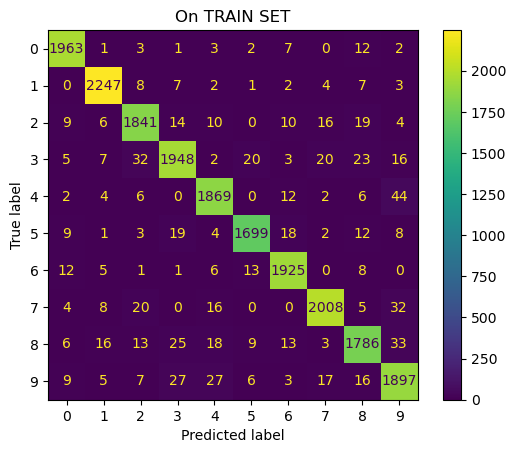

In [138]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

conf_mtx = confusion_matrix(y_train,y_predict)
conf_mtx

conf_mtx = confusion_matrix(y_train, y_predict)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_mtx)
disp.plot()
plt.title("On TRAIN SET")
plt.show()

0.9458


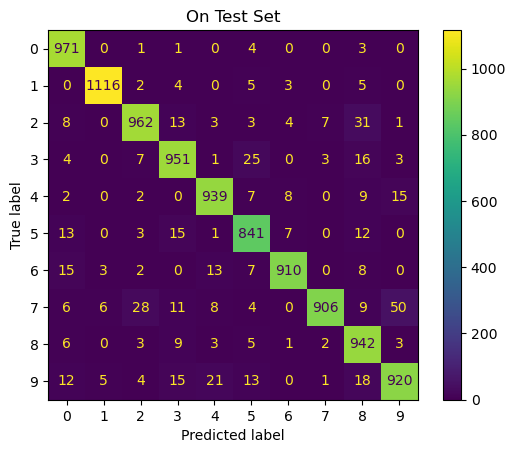

In [137]:
# testing accuracy on test set
from sklearn.metrics import precision_score,roc_auc_score,accuracy_score
X_test_scaled = std_scaler.fit_transform(X_test)
prediction = best_model.predict(X_test_scaled)
print(accuracy_score(y_test,prediction))
conf_mtx = confusion_matrix(y_test, prediction)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_mtx)
disp.plot()
plt.title("On Test Set")
plt.show()

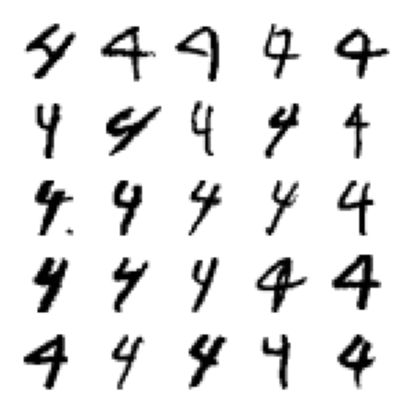

In [93]:
y_train_num = y_train.astype(np.uint8)
y_predict_num = y_predict.astype(np.uint8)
X_ab = X_train[(y_train_num == 4) & (y_predict_num == 9)]
x = X_ab.to_numpy()
# img = x.reshape(28,28)
# img1 =x[0].reshape(28,28)
# plt.imshow(img1,cmap = 'binary')
def plot_digits(instances, images_per_row=5, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size, size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row: (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap='binary', **options)
    plt.axis("off")

# Plot incorrectly classified images
plt.figure(figsize=(5, 5))
plot_digits(x[:25], images_per_row=5)
plt.show()

In [139]:
random_gridSearch.best_estimator_

RandomForestClassifier(bootstrap=False, random_state=42)

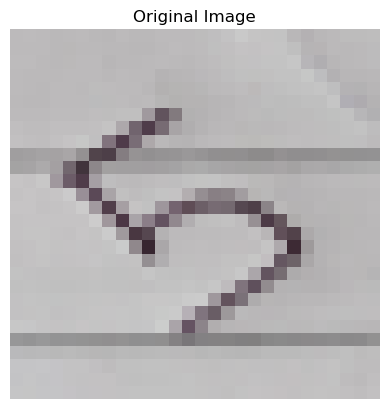

In [152]:
from PIL import Image
image_path = 'D:/five.jpg'
img = Image.open(image_path)

img = img.resize((28, 28))

plt.imshow(img, cmap='gray')
plt.title('Original Image')
plt.axis('off')
plt.show()
